In [165]:
import numpy as np
import matplotlib.pyplot as plt
import math, cmath

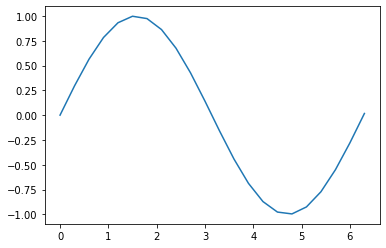

In [166]:
def broad(f, arr):
    output = []
    for c in arr:
        output.append(f(c))
    return np.array(output)

j = complex(0,1)
x = np.arange(0, 2*math.pi+0.3, 0.3)
y = broad(cmath.exp, j*x)
plt.plot(x, y.imag)

In [167]:
def plotSig(y, title, style = 'b-o'):
    plt.plot(x,y, style)
    plt.title(title)
    plt.grid()

def plotfs(fs, title, markerstyle='bo', linestyle='b-'):
    N = len(fs)//2
    
    plt.plot(np.arange(-N, N+1,1), fs, markerstyle)
    for i in range(len(y)):
        plt.plot([i-N, i-N], [0, fs[i]], linestyle)
    plt.title(title)

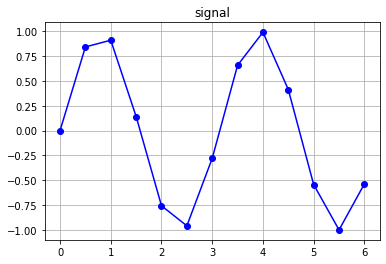

In [168]:
y = []
x = np.arange(0,2*cmath.pi, 0.5)

for ele in x:
    y.append(math.sin(2*ele))
y = np.array(y)

# y = np.concatenate((-10*np.ones(3), np.ones(3)))


plotSig(y, 'signal')

In [169]:
np.concatenate((-np.ones(5), np.ones(5)))

array([-1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.])

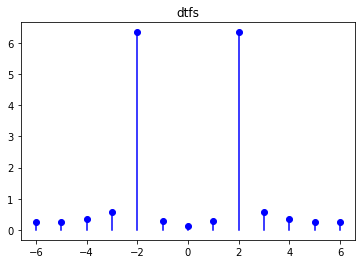

In [170]:
def dtfs(y):
    j = complex(0, 1)
    AKL = []
    N = len(y)
    for k in range(N):
        ak = 0
        for n in range(N):
            ak += y[n]*cmath.exp(-j*2*cmath.pi*(k-N//2)*n/N)
        AKL.append(ak)
    return AKL
fs = dtfs(y)

fsMag = [abs(c) for c in fs]

plotfs(fsMag, 'dtfs')

In [171]:
def rdtfs(fs):
    j = complex(0, 1)
    yL = []
    N = len(fs)
    for n in range(N):
        y = 0
        for k in range(N):
            y += 1/N*fs[k]*cmath.exp(j*2*cmath.pi*(k-N//2)*n/N)
        yL.append(y)
    return yL

[2.7755575615628914e-17, 0.8414709848078964, 0.9092974268256833, 0.14112000805986574, -0.756802495307928, -0.958924274663139, -0.27941549819892453, 0.6569865987187877, 0.9893582466233822, 0.41211848524175637, -0.544021110889371, -0.9999902065507038, -0.5365729180004335]


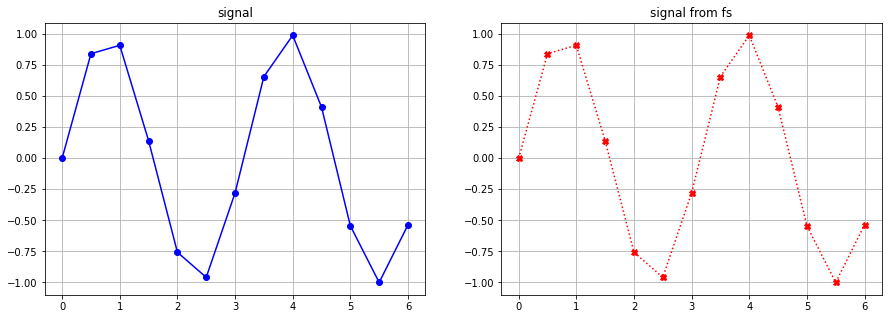

In [172]:
y1 = rdtfs(fs)
y1 = [c.real for c in rdtfs(fs)]
print(y1)

plt.figure(figsize = (15,5))
plt.subplot(121)
plotSig(y, 'signal', 'b-o')
plt.subplot(122)
plotSig(y1, 'signal from fs', 'r:X')